In [1]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from pandas.plotting import scatter_matrix
import pathlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
PROJECT_CODE='PRJNA607174'
BASE_PATH = f'/mnt/1TB_0/Data/Assembly/{PROJECT_CODE}/'

dbname='nt'
kmer='k141'

f_contigs_file_tail=f'_{dbname}_magic_blast_asc_contigs.txt'

In [4]:
subsets=['vector','virus']

In [71]:
path = BASE_PATH+'/contig_subsets/virus/'
df=pd.read_csv(path+'PRJNA607174_contig_BLAST_analysis_virus_magicblast_nt.tsv', sep='\t')

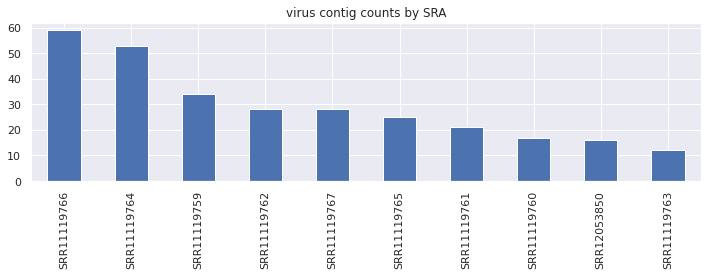

In [83]:
df['sra'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title('virus' +' contig counts by SRA')
plt.tight_layout()
plt.savefig(path+'PRJNA607174_contig_BLAST_analysis_virus_magicblast_nt_sras.png')
plt.show()

In [84]:
asc=df['accession']

In [85]:
asc.unique()

array(['GQ477367.1', 'JN415766.1', 'JQ743319.1', 'JQ743323.1',
       'JQ911763.1', 'JX904080.1', 'JX904642.1', 'KC237064.1',
       'KC893344.1', 'KJ938717.1', 'KP133078.1', 'KP717417.1',
       'KP745672.1', 'KP745679.1', 'KP745692.1', 'KP849472.1',
       'KR534200.1', 'KR534203.1', 'KT120023.1', 'KT264754.1',
       'KT862243.1', 'KT862244.1', 'KT862246.1', 'KU727766.1',
       'KX100034.1', 'KX883984.1', 'KX905134.1', 'KY423284.1',
       'KY685075.1', 'LR882367.1', 'M57546.1', 'MF175072.1', 'MF599468.1',
       'MG921602.1', 'MH362816.1', 'MH370862.1', 'MH883318.1',
       'MH939369.1', 'MH939453.1', 'MK028670.1', 'MK423233.1',
       'MK496822.1', 'MK554698.1', 'MK636874.1', 'MK636875.1',
       'MK986748.1', 'MN175975.1', 'MN207061.1', 'MN274568.2',
       'MN379609.1', 'MN793051.1', 'MN851295.1', 'MT044478.1',
       'MT084071.1', 'MT114544.1', 'MT121216.1', 'MT318129.1',
       'MT799521.1', 'MT799522.1', 'MT799524.1', 'MT799525.1',
       'MT799526.1', 'MT886700.1', 'MT89414

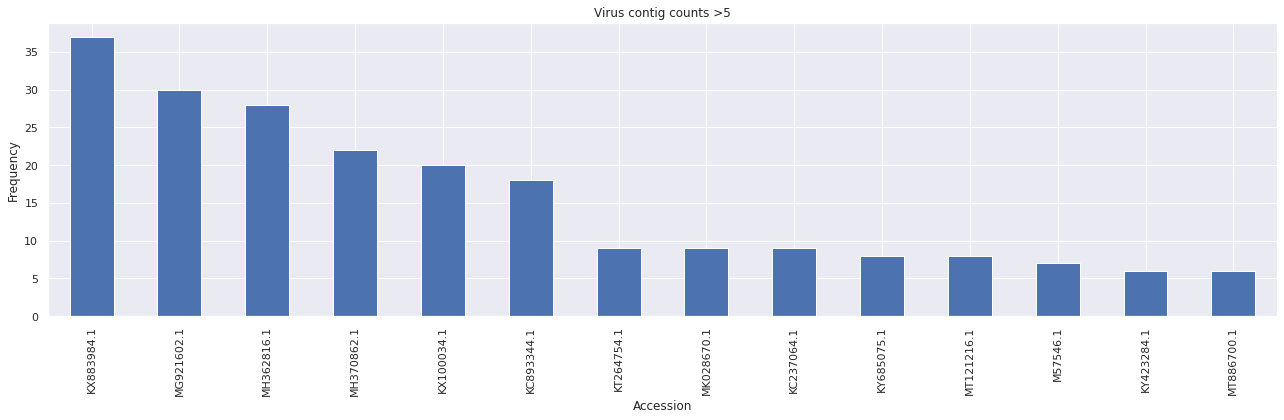

In [86]:
ax = df['accession'].value_counts().loc[lambda x : x>5].plot(kind='bar',
                                    figsize=(18,6),
                                    title="Virus contig counts >5")
ax.set_xlabel("Accession")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.savefig(path+'PRJNA607174_contig_BLAST_analysis_virus_magicblast_nt_accessions_>5.png')

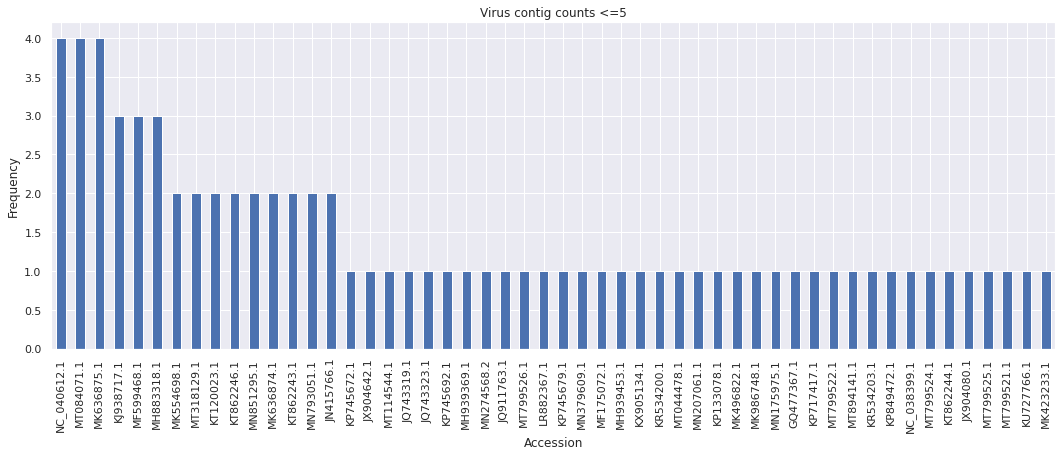

In [82]:
ax = df['accession'].value_counts().loc[lambda x : x<=5].plot(kind='bar',
                                    figsize=(18,6),
                                    title="Virus contig counts <=5")
ax.set_xlabel("Accession")
ax.set_ylabel("Frequency")
plt.savefig(path+'PRJNA607174_contig_BLAST_analysis_virus_magicblast_nt_accessions_<=5.png')

## vectors

In [96]:
path = BASE_PATH+'/contig_subsets/vector/'
df=pd.read_csv(path+'PRJNA607174_contig_BLAST_analysis_vector_magicblast_nt.tsv', sep='\t')
df.head()

,sra,contig,accession,description,cigar
0,SRR11119760,k141_914,AB545980.1,"Cloning vector pTip-istAB-sacB DNA, complete s...",719M
1,SRR11119761,k141_1166153,AB570081.1,"Cloning vector pInSRT-GFPV1 DNA, complete sequ...",370M
2,SRR11119767,k141_873975,AB609713.1,"Gene trap vector pCMT-SAhygpA-NP21 DNA, comple...",105S246M
3,SRR11119767,k141_873975,AB609714.1,"Gene trap vector pCMT-SAhygpA-NP22 DNA, comple...",105S246M
4,SRR11119767,k141_873975,AB609715.1,Tol2 transposon-based gene trap vector pT2F2-S...,105S246M


In [98]:
descr=df['description']
descr.unique()

array(['Cloning vector pTip-istAB-sacB DNA, complete sequence',
       'Cloning vector pInSRT-GFPV1 DNA, complete sequence',
       'Gene trap vector pCMT-SAhygpA-NP21 DNA, complete sequence',
       'Gene trap vector pCMT-SAhygpA-NP22 DNA, complete sequence',
       'Tol2 transposon-based gene trap vector pT2F2-SAhygpA-NP21 DNA, complete sequence',
       'Tol2 transposon-based gene trap vector pT2F2-SAhygpA-NP22 DNA, complete sequence',
       'Escherichia coli-Bacteroides shuttle vector pVAL-1 DNA, complete sequence',
       'Escherichia coli-Bacteroides shuttle vector pTIO-1 DNA, complete sequence',
       'Homo sapiens 12 NOVECTOR RP11-1006M13 () complete sequence',
       'Homo sapiens 3 NOVECTOR RP11-784F16 (Roswell Park Cancer Institute Human BAC Library) complete sequence',
       'Homo sapiens 12 NOVECTOR RP11-627D10 (Roswell Park Cancer Institute Human BAC Library) complete sequence',
       "Bos taurus NOVECTOR CH240-248M14 (Children's Hospital Oakland Research Institute Bo

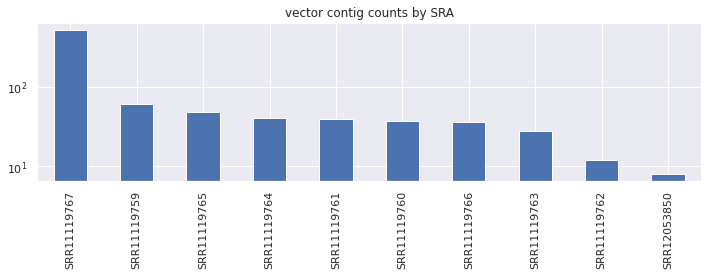

In [89]:
df['sra'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title('vector' +' contig counts by SRA')
plt.yscale('log')
plt.tight_layout()
plt.savefig(path+'PRJNA607174_contig_BLAST_analysis_vector_magicblast_nt_sras.png')
plt.show()

In [90]:
def proc(s):
    l = s.split()
    return ' '.join(l[:2])

In [91]:
df['class'] = [proc(s) for s in df['description'].values.tolist()]

In [92]:
df.head()

,sra,contig,accession,description,cigar,class
0,SRR11119760,k141_914,AB545980.1,"Cloning vector pTip-istAB-sacB DNA, complete s...",719M,Cloning vector
1,SRR11119761,k141_1166153,AB570081.1,"Cloning vector pInSRT-GFPV1 DNA, complete sequ...",370M,Cloning vector
2,SRR11119767,k141_873975,AB609713.1,"Gene trap vector pCMT-SAhygpA-NP21 DNA, comple...",105S246M,Gene trap
3,SRR11119767,k141_873975,AB609714.1,"Gene trap vector pCMT-SAhygpA-NP22 DNA, comple...",105S246M,Gene trap
4,SRR11119767,k141_873975,AB609715.1,Tol2 transposon-based gene trap vector pT2F2-S...,105S246M,Tol2 transposon-based


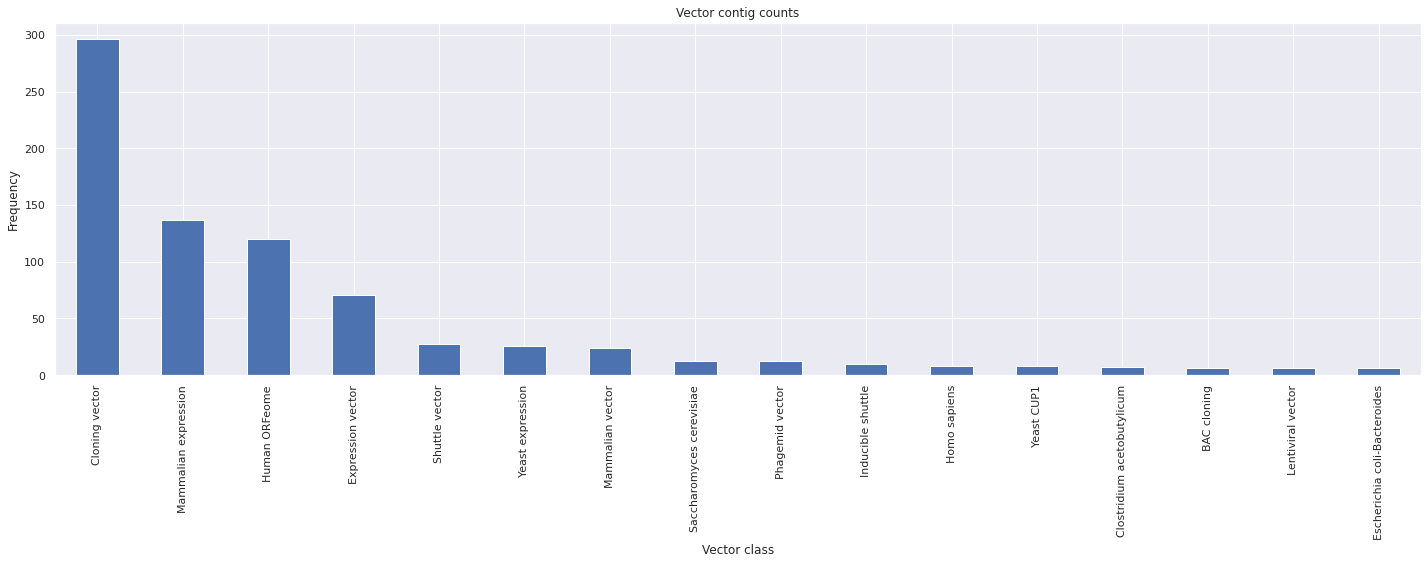

In [95]:
ax = df['class'].value_counts().loc[lambda x : x>5].plot(kind='bar',
                                    figsize=(20,8),
                                    title="Vector contig counts")
ax.set_xlabel("Vector class")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.savefig(path+'PRJNA607174_contig_BLAST_analysis_vector_magicblast_nt_vector_clas_>5.png')

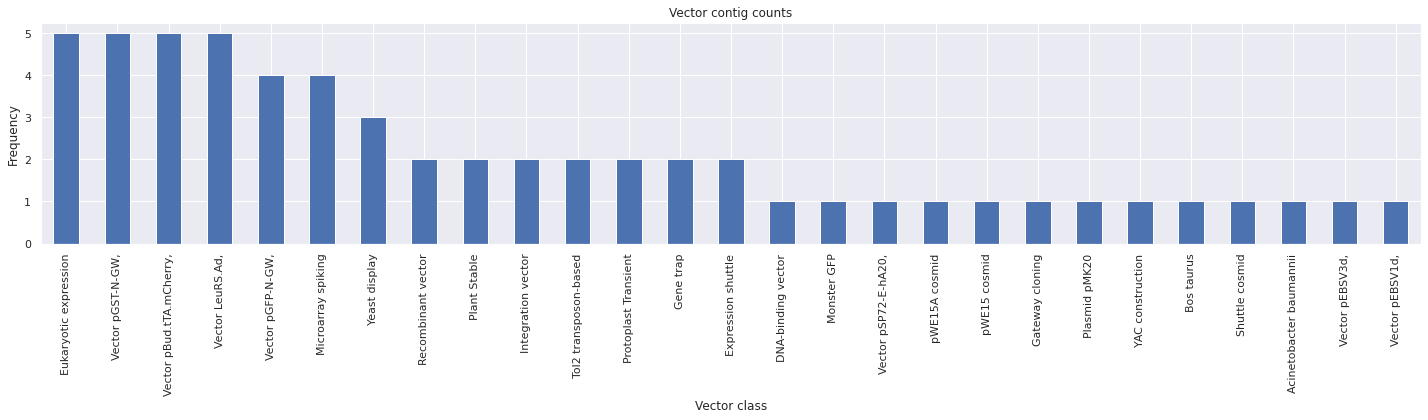

In [61]:
ax = df['class'].value_counts().loc[lambda x : x<=5].plot(kind='bar',
                                    figsize=(20,6),
                                    title="Vector contig counts")
ax.set_xlabel("Vector class")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.savefig(path+'PRJNA607174_contig_BLAST_analysis_vector_magicblast_nt_vector_clas_<5.png')